In [1]:
# Additional library to install before proceeding

'''
$ conda install -c conda-forge mlxtend         or
$ conda install -c conda-forge/label/gcc7 mlxtend
'''

'\n$ conda install -c conda-forge mlxtend         or\n$ conda install -c conda-forge/label/gcc7 mlxtend\n'

In [2]:
# import the libraries required
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
# load the data into a pandas dataframe and take a look at the first 10 rows
bread = pd.read_csv("BreadBasket_DMS.csv")
bread.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [4]:
# check the summary info of the dataframe
bread.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [5]:
# check for missing values
bread.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [6]:
missing_value = ["NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0]
print("There are {0} missing values in the dataframe.".format(len(bread[bread.Item.isin(missing_value)])))
bread[bread.Item.isin(missing_value)].head(10)

There are 786 missing values in the dataframe.


,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
85,2016-10-30,11:55:51,40,NONE
126,2016-10-30,13:02:04,59,NONE
140,2016-10-30,13:37:25,65,NONE
149,2016-10-30,13:46:48,67,NONE
167,2016-10-30,14:32:26,75,NONE


In [7]:
bread = bread.drop(bread[bread.Item == "NONE"].index)
print("Number of rows: {0}".format(len(bread)))
bread.head(10)

Number of rows: 20507


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [8]:
bread['Datetime'] = pd.to_datetime(bread['Date']+' '+bread['Time'])
bread = bread[["Datetime", "Transaction", "Item"]].set_index("Datetime")
bread.head(10)

,Transaction,Item
Datetime,,
2016-10-30 09:58:11,1,Bread
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:07:57,3,Hot chocolate
2016-10-30 10:07:57,3,Jam
2016-10-30 10:07:57,3,Cookies
2016-10-30 10:08:41,4,Muffin
2016-10-30 10:13:03,5,Coffee
2016-10-30 10:13:03,5,Pastry


In [9]:
total_items = len(bread)
total_days = len(np.unique(bread.index.date))
total_months = len(np.unique(bread.index.month))
average_items = total_items / total_days
unique_items = bread.Item.unique().size

print("There are {} unique items sold by the Bakery".format(unique_items))
print("Total {} items sold in {} days throughout {} months".format(total_items, total_days, total_months))
print("With an average of {} items sold daily".format(average_items))


There are 94 unique items sold by the Bakery
Total 20507 items sold in 159 days throughout 7 months
With an average of 128.9748427672956 items sold daily


In [10]:
bread.Item.value_counts(normalize=True)[:10]

Coffee           0.266787
Bread            0.162140
Tea              0.069976
Cake             0.049983
Pastry           0.041742
Sandwich         0.037597
Medialuna        0.030039
Hot chocolate    0.028771
Cookies          0.026332
Brownie          0.018481
Name: Item, dtype: float64

[Text(0.5, 0, 'Item'), Text(0, 0.5, 'Percentage')]

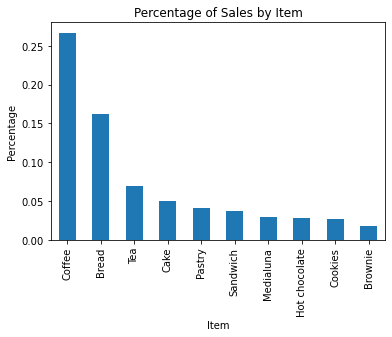

In [11]:
bread.Item.value_counts(normalize=True)[:10].plot(kind="bar", title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")

[Text(0.5, 0, 'Item'), Text(0, 0.5, 'Total Number')]

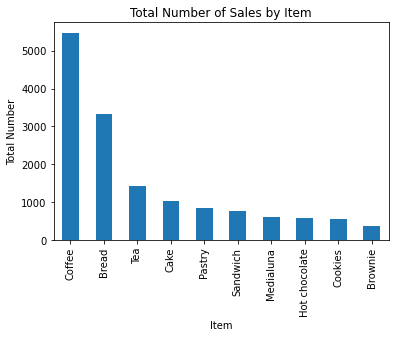

In [12]:
bread.Item.value_counts()[:10].plot(kind="bar", title="Total Number of Sales by Item").set(xlabel="Item", ylabel="Total Number")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

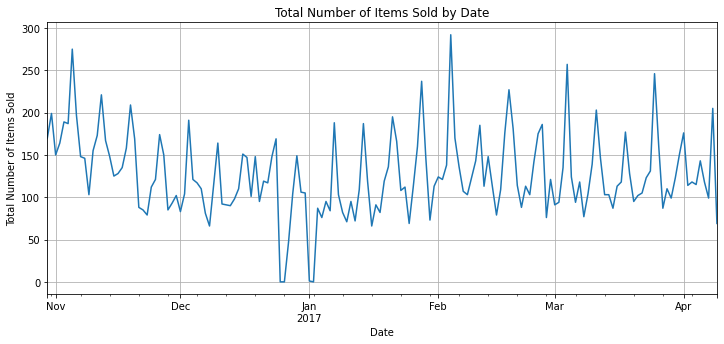

In [13]:
bread["Item"].resample("D").count().plot(figsize=(12,5), grid=True, title="Total Number of Items Sold by Date").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [14]:
bread["Item"].resample("M").count()

Datetime
2016-10-31     369
2016-11-30    4436
2016-12-31    3339
2017-01-31    3356
2017-02-28    3906
2017-03-31    3944
2017-04-30    1157
Freq: M, Name: Item, dtype: int64

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Total Number of Items Sold')]

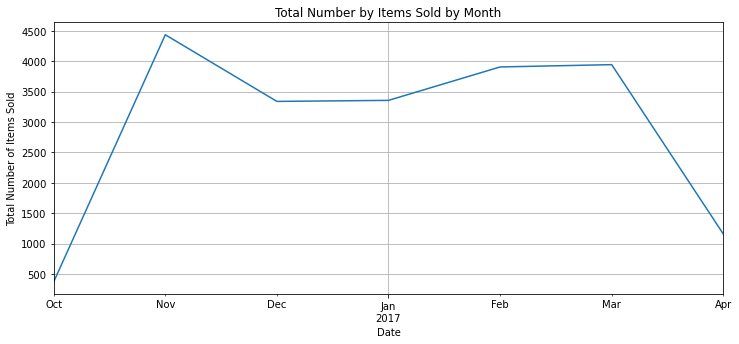

In [15]:
bread["Item"].resample("M").count().plot(figsize=(12,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")

In [16]:
bread["Hour"] = bread.index.hour
bread["Weekday"] = bread.index.weekday + 1

bread.head(10)

,Transaction,Item,Hour,Weekday
Datetime,,,,
2016-10-30 09:58:11,1,Bread,9,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:07:57,3,Hot chocolate,10,7
2016-10-30 10:07:57,3,Jam,10,7
2016-10-30 10:07:57,3,Cookies,10,7
2016-10-30 10:08:41,4,Muffin,10,7
2016-10-30 10:13:03,5,Coffee,10,7
2016-10-30 10:13:03,5,Pastry,10,7


In [17]:
bread_groupby_hour = bread.groupby("Hour").agg({"Item": lambda item: item.count()/total_days})
bread_groupby_hour

,Item
Hour,
1,0.006289
7,0.150943
8,4.056604
9,12.364780
10,16.767296
11,19.509434
12,17.949686
13,16.459119
14,16.603774


[Text(0.5, 0, 'Hour of the Day (24 hour time)'),
 Text(0, 0.5, 'Average Number of Items Sold')]

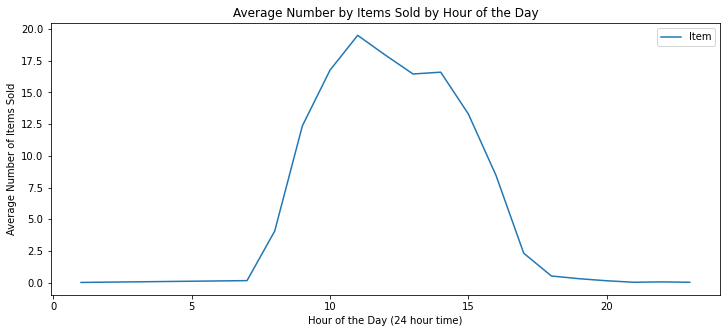

In [18]:
bread_groupby_hour.plot(y="Item", figsize=(12,5), title="Average Number by Items Sold by Hour of the Day").set(xlabel="Hour of the Day (24 hour time)", ylabel="Average Number of Items Sold")

In [19]:
bread_groupby_weekday = bread.groupby("Weekday").agg({"Item": lambda item: item.count()})
bread_groupby_weekday

,Item
Weekday,
1,2324
2,2392
3,2321
4,2646
5,3124
6,4605
7,3095


In [20]:
import datetime 
daterange = pd.date_range(datetime.date(2016, 10, 30), datetime.date(2017, 4, 9))

monday = 0
tuesday = 0
wednesday = 0
thursday = 0
friday = 0
saturday = 0
sunday = 0

for day in np.unique(bread.index.date):
    if day.isoweekday() == 1:
        monday += 1
    elif day.isoweekday() == 2:
        tuesday += 1
    elif day.isoweekday() == 3:
        wednesday += 1
    elif day.isoweekday() == 4:
        thursday += 1        
    elif day.isoweekday() == 5:
        friday += 1        
    elif day.isoweekday() == 6:
        saturday += 1        
    elif day.isoweekday() == 7:
        sunday += 1        
        
all_weekdays = monday + tuesday + wednesday + thursday + friday + saturday + sunday

print("monday = {0}, tuesday = {1}, wednesday = {2}, thursday = {3}, friday = {4}, saturday = {5}, sunday = {6}, total = {7}".format(monday, tuesday, wednesday, thursday, friday, saturday, sunday, all_weekdays))

monday = 21, tuesday = 23, wednesday = 23, thursday = 23, friday = 23, saturday = 23, sunday = 23, total = 159


In [21]:
conditions = [
    (bread_groupby_weekday.index == 1),
    (bread_groupby_weekday.index == 2),
    (bread_groupby_weekday.index == 3),
    (bread_groupby_weekday.index == 4),
    (bread_groupby_weekday.index == 5),
    (bread_groupby_weekday.index == 6),
    (bread_groupby_weekday.index == 7)]

choices = [bread_groupby_weekday.Item/21, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23, bread_groupby_weekday.Item/23]

bread_groupby_weekday["Average"] = np.select(conditions, choices, default=0)
bread_groupby_weekday

,Item,Average
Weekday,,
1,2324,110.666667
2,2392,104.000000
3,2321,100.913043
4,2646,115.043478
5,3124,135.826087
6,4605,200.217391
7,3095,134.565217


[Text(0.5, 0, 'Day of the Week (1=Monday, 7=Sunday)'),
 Text(0, 0.5, 'Average Number of Items Sold')]

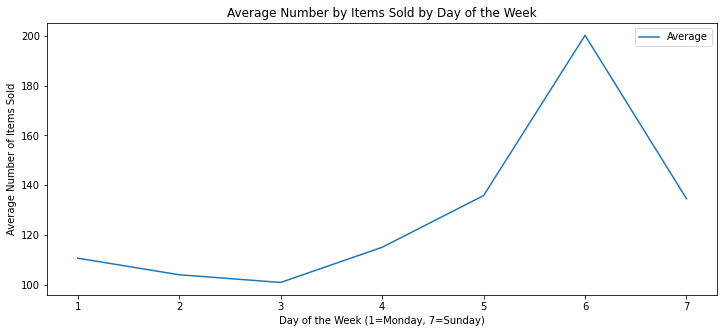

In [22]:
bread_groupby_weekday.plot(y="Average", figsize=(12,5), title="Average Number by Items Sold by Day of the Week").set(xlabel="Day of the Week (1=Monday, 7=Sunday)", ylabel="Average Number of Items Sold")

In [23]:
df = bread.groupby(["Transaction","Item"]).size().reset_index(name="Count")

df.head()

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1


In [24]:
basket = (df.groupby(['Transaction', 'Item'])['Count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
P1 = bread[bread['Item'] == 'Coffee']
P2 = bread[bread['Item'] == 'Bread']
P3 = bread[bread['Item'] == 'Tea']
P4 = bread[bread['Item'] == 'Cake']
P5 = bread[bread['Item'] == 'Pastry']

Frames = [P1, P2, P3, P4, P5]
dataSubset = pd.concat(Frames)

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

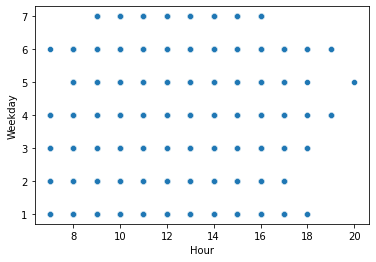

In [26]:
import seaborn as sns
sns.scatterplot(x=dataSubset[dataSubset['Item']=='Coffee']['Hour'], y=dataSubset[dataSubset['Item']=='Coffee']['Weekday'])

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

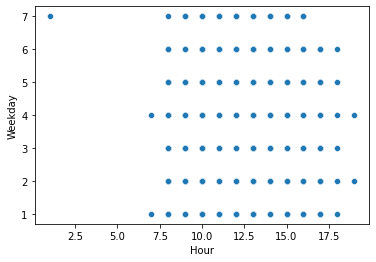

In [27]:
sns.scatterplot(x=dataSubset[dataSubset['Item']=='Bread']['Hour'], y=dataSubset[dataSubset['Item']=='Bread']['Weekday'])

In [23]:
df = bread.groupby(["Transaction","Item"]).size().reset_index(name="Count")

df.head()

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1


In [24]:
basket = (df.groupby(['Transaction', 'Item'])['Count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Transaction'))

basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
basket[basket.Coffee == 4].iloc[:,14:28]

Item,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes
Transaction,,,,,,,,,,,,,,
6560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0
6850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
6887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [26]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1


In [27]:
basket_sets = basket.applymap(encode_units)

basket_sets.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
basket_sets[basket_sets.Coffee == 1].iloc[3142:3145,14:28]

Item,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes
Transaction,,,,,,,,,,,,,,
6884,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6885,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6887,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [29]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values("confidence", ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [31]:
# Applying ML Algos for Top 5 most sold items

In [32]:
P1 = bread[bread['Item'] == 'Coffee']
P2 = bread[bread['Item'] == 'Bread']
P3 = bread[bread['Item'] == 'Tea']
P4 = bread[bread['Item'] == 'Cake']
P5 = bread[bread['Item'] == 'Pastry']

Frames = [P1, P2, P3, P4, P5]
dataSubset = pd.concat(Frames)

In [33]:
bread.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20507 entries, 2016-10-30 09:58:11 to 2017-04-09 15:04:24
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaction  20507 non-null  int64 
 1   Item         20507 non-null  object
 2   Hour         20507 non-null  int64 
 3   Weekday      20507 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 801.1+ KB


In [34]:
bread.head(10)

,Transaction,Item,Hour,Weekday
Datetime,,,,
2016-10-30 09:58:11,1,Bread,9,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:07:57,3,Hot chocolate,10,7
2016-10-30 10:07:57,3,Jam,10,7
2016-10-30 10:07:57,3,Cookies,10,7
2016-10-30 10:08:41,4,Muffin,10,7
2016-10-30 10:13:03,5,Coffee,10,7
2016-10-30 10:13:03,5,Pastry,10,7


In [35]:
bread['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

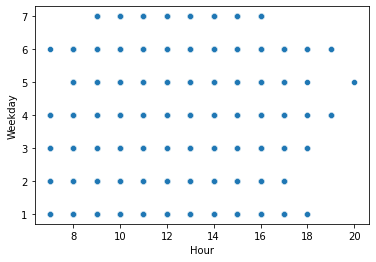

In [36]:
import seaborn as sns
sns.scatterplot(x=dataSubset[dataSubset['Item']=='Coffee']['Hour'], y=dataSubset[dataSubset['Item']=='Coffee']['Weekday'])

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

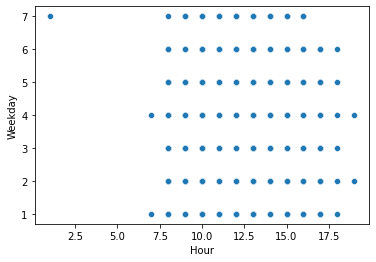

In [37]:
sns.scatterplot(x=dataSubset[dataSubset['Item']=='Bread']['Hour'], y=dataSubset[dataSubset['Item']=='Bread']['Weekday'])

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

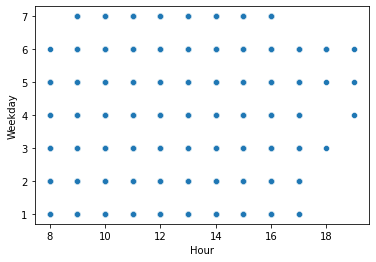

In [38]:
sns.scatterplot(x=dataSubset[dataSubset['Item']=='Tea']['Hour'], y=dataSubset[dataSubset['Item']=='Tea']['Weekday'])

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

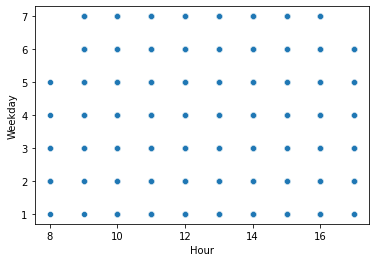

In [39]:
sns.scatterplot(x=dataSubset[dataSubset['Item']=='Cake']['Hour'], y=dataSubset[dataSubset['Item']=='Cake']['Weekday'])

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

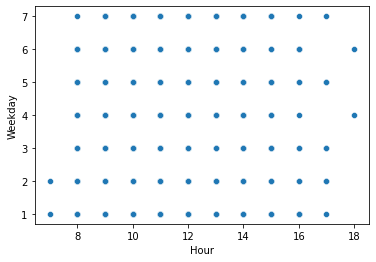

In [40]:
sns.scatterplot(x=dataSubset[dataSubset['Item']=='Pastry']['Hour'], y=dataSubset[dataSubset['Item']=='Pastry']['Weekday'])

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bread['ItemNo'] = le.fit_transform(bread['Item'])

In [42]:
P1 = bread[bread['Item'] == 'Coffee']
P2 = bread[bread['Item'] == 'Bread']
P3 = bread[bread['Item'] == 'Tea']
P4 = bread[bread['Item'] == 'Cake']
P5 = bread[bread['Item'] == 'Pastry']

Frames = [P1, P2, P3, P4, P5]
dataSubset = pd.concat(Frames)

In [43]:
from sklearn.cluster import KMeans

dataframe = dataSubset[['ItemNo', 'Hour', 'Weekday']]

kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit_predict(dataframe)
print("Cluster centers\n", kmeans.cluster_centers_)
dataframe['cluster'] = kmeans.labels_

Cluster centers
 [[23.         10.24281366  4.48461278]
 [83.         12.79930314  4.10592334]
 [11.94252874 12.17747126  4.39678161]
 [65.         10.82009346  4.19392523]
 [23.         14.06085919  4.0043755 ]]


<ipython-input-43-9c58a6f968a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['cluster'] = kmeans.labels_


<AxesSubplot:xlabel='cluster', ylabel='ItemNo'>

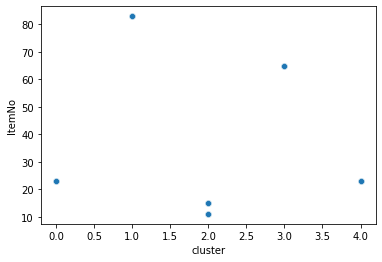

In [44]:
import seaborn as sns
sns.scatterplot(data = dataframe, x = dataframe.cluster, y = dataframe.ItemNo)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
features = dataSubset[['Hour', 'Weekday']]
target = dataSubset['ItemNo']

x_train, x_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.3)

In [47]:
from sklearn.tree import DecisionTreeClassifier

classifierDT = DecisionTreeClassifier()
classifierDT.fit(x_train, y_train)
predicted_labels = classifierDT.predict(x_test)
classifierDT.score(x_test, y_test)

0.43395707209686296

In [48]:
from sklearn import metrics

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, predicted_labels))
print(metrics.classification_report(y_test, predicted_labels))

Confusion Matrix
[[  31    0 1007    0    7]
 [   6    0  310    0    4]
 [  54    0 1539    0   10]
 [  15    0  213    0    0]
 [  10    0  421    0    7]]
              precision    recall  f1-score   support

          11       0.27      0.03      0.05      1045
          15       0.00      0.00      0.00       320
          23       0.44      0.96      0.60      1603
          65       0.00      0.00      0.00       228
          83       0.25      0.02      0.03       438

    accuracy                           0.43      3634
   macro avg       0.19      0.20      0.14      3634
weighted avg       0.30      0.43      0.29      3634



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from sklearn.naive_bayes import GaussianNB

classifierNB = GaussianNB()
classifierNB.fit(x_train, y_train)
predicted_labels = classifierNB.predict(x_test)
classifierNB.score(x_test, y_test)

0.44111172261970283

In [50]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, predicted_labels))
print(metrics.classification_report(y_test, predicted_labels))

Confusion Matrix
[[   0    0 1045    0    0]
 [   0    0  320    0    0]
 [   0    0 1603    0    0]
 [   0    0  228    0    0]
 [   0    0  438    0    0]]
              precision    recall  f1-score   support

          11       0.00      0.00      0.00      1045
          15       0.00      0.00      0.00       320
          23       0.44      1.00      0.61      1603
          65       0.00      0.00      0.00       228
          83       0.00      0.00      0.00       438

    accuracy                           0.44      3634
   macro avg       0.09      0.20      0.12      3634
weighted avg       0.19      0.44      0.27      3634



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
